In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#Data pre-processing

Loading dataset

In [44]:
data=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [45]:
data.shape

(1470, 35)

Checking for null values

In [46]:
data.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [47]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [48]:
data = pd.get_dummies(df, columns=['TotalWorkingYears'])
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears_30,TotalWorkingYears_31,TotalWorkingYears_32,TotalWorkingYears_33,TotalWorkingYears_34,TotalWorkingYears_35,TotalWorkingYears_36,TotalWorkingYears_37,TotalWorkingYears_38,TotalWorkingYears_40
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,0,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,0,0,0,0,0,0,0,0,0,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,0,0,0,0,0,0,0,0,0,0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,0,0,0,0,0,0,0,0,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,0,0,0,0,0,0,0,0,0,0


# Data Visualization

In [49]:
data.corr()

<ipython-input-49-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TotalWorkingYears_30,TotalWorkingYears_31,TotalWorkingYears_32,TotalWorkingYears_33,TotalWorkingYears_34,TotalWorkingYears_35,TotalWorkingYears_36,TotalWorkingYears_37,TotalWorkingYears_38,TotalWorkingYears_40
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.132588,0.136256,0.129571,0.129342,0.105401,0.082908,0.126717,0.109113,0.060215,0.085185
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,-0.001455,0.019904,0.026519,-0.023307,-0.041434,-0.041497,-0.027957,0.003531,-0.007793,-0.053621
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,-0.047978,-0.013701,0.003516,-0.001643,-0.043199,0.013806,0.031394,-0.014132,0.002600,0.015064
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.003769,0.032229,0.040747,0.015535,0.027793,0.003846,0.067974,0.029953,0.027703,0.039191
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TotalWorkingYears_35,0.082908,-0.041497,0.013806,0.003846,NaN,0.030868,-0.002280,-0.007175,0.038361,0.079120,...,-0.003128,-0.003549,-0.003549,-0.003128,-0.002642,1.000000,-0.002895,-0.002362,-0.001180,-0.001669
TotalWorkingYears_36,0.126717,-0.027957,0.031394,0.067974,NaN,0.008294,0.026065,0.045495,0.039306,0.140934,...,-0.004428,-0.005025,-0.005025,-0.004428,-0.003740,-0.002895,1.000000,-0.003344,-0.001670,-0.002363
TotalWorkingYears_37,0.109113,0.003531,-0.014132,0.029953,NaN,-0.025875,0.001350,0.000922,-0.016885,0.091391,...,-0.003613,-0.004100,-0.004100,-0.003613,-0.003052,-0.002362,-0.003344,1.000000,-0.001363,-0.001928
TotalWorkingYears_38,0.060215,-0.007793,0.002600,0.027703,NaN,-0.038752,0.030521,-0.037092,0.009906,0.045649,...,-0.001805,-0.002048,-0.002048,-0.001805,-0.001524,-0.001180,-0.001670,-0.001363,1.000000,-0.000963


<Axes: >

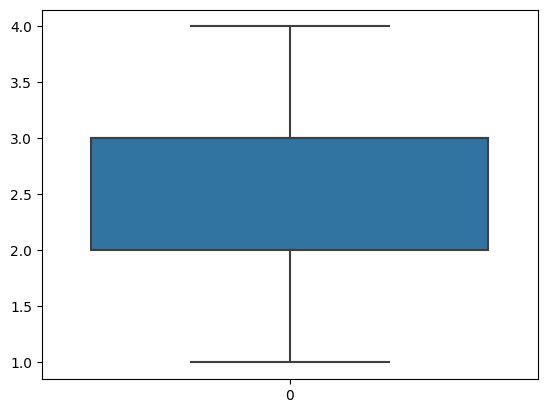

In [50]:
sns.boxplot(data.JobInvolvement)

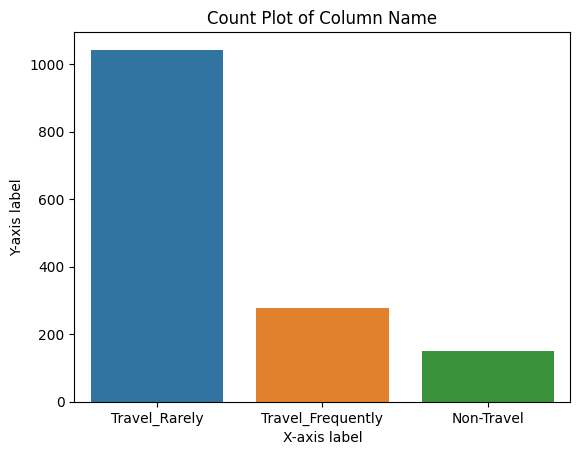

In [51]:
sns.countplot(x='BusinessTravel', data=data)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Count Plot of Column Name')
plt.show()

<ipython-input-52-368e96cf2ea0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["DistanceFromHome"])


<Axes: xlabel='DistanceFromHome', ylabel='Density'>

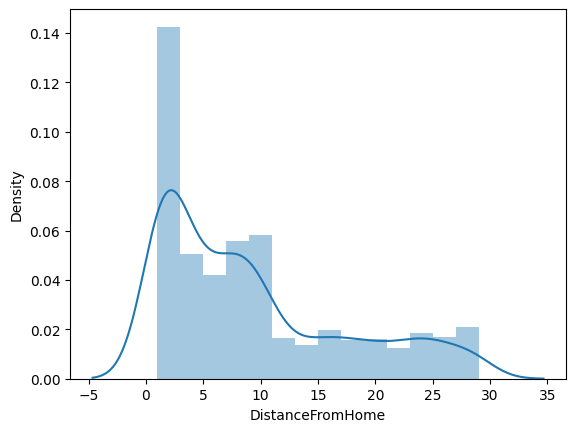

In [52]:
sns.distplot(data["DistanceFromHome"])

<Axes: >

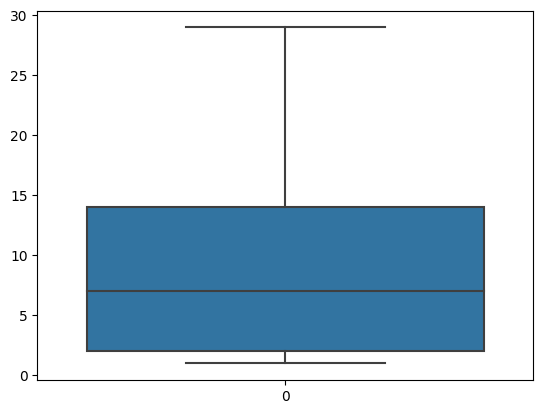

In [53]:
sns.boxplot(data.DistanceFromHome)

In [54]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears_30,TotalWorkingYears_31,TotalWorkingYears_32,TotalWorkingYears_33,TotalWorkingYears_34,TotalWorkingYears_35,TotalWorkingYears_36,TotalWorkingYears_37,TotalWorkingYears_38,TotalWorkingYears_40
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,0,0,0,0,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,0,0,0,0,0,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,0,0,0,0,0,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,0,0,0,0,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,0,0,0,0,0,0,0,0,0,0


# Splitting Dependent and Independent Values

In [55]:
X=data.iloc[:,1:4]
X.head()

,Attrition,BusinessTravel,DailyRate
0,Yes,Travel_Rarely,1102
1,No,Travel_Frequently,279
2,Yes,Travel_Rarely,1373
3,No,Travel_Frequently,1392
4,No,Travel_Rarely,591


In [56]:
y=data.DailyRate
y.head()

0    1102
1     279
2    1373
3    1392
4     591
Name: DailyRate, dtype: int64

# Label Encoding

In [57]:
data['encoded_column'] = data['YearsAtCompany'].astype('category').cat.codes
print(data.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  TotalWorkingYears_31 TotalWorkingYears_32  TotalWorkingYears_33  \

# Splitting Data into train and test

In [58]:
X = data.drop('YearsWithCurrManager', axis=1)
y = data['YearsWithCurrManager']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears_31,TotalWorkingYears_32,TotalWorkingYears_33,TotalWorkingYears_34,TotalWorkingYears_35,TotalWorkingYears_36,TotalWorkingYears_37,TotalWorkingYears_38,TotalWorkingYears_40,encoded_column
1097,24,No,Travel_Rarely,350,Research & Development,21,2,Technical Degree,1,1551,...,0,0,0,0,0,0,0,0,0,1
727,18,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,...,0,0,0,0,0,0,0,0,0,0
254,29,No,Travel_Rarely,1247,Sales,20,2,Marketing,1,349,...,0,0,0,0,0,0,0,0,0,3
1175,39,No,Travel_Rarely,492,Research & Development,12,3,Medical,1,1654,...,0,0,0,0,0,0,0,0,0,5
1341,31,No,Travel_Rarely,311,Research & Development,20,3,Life Sciences,1,1881,...,0,0,0,0,0,0,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,35,No,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,0,0,0,0,0,0,0,0,0,10
1294,41,No,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1,1814,...,0,0,0,0,0,0,0,0,0,3
860,22,Yes,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1,1203,...,0,0,0,0,0,0,0,0,0,0
1459,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,1,2053,...,0,0,0,0,0,0,0,0,0,4


In [60]:
X_test

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears_31,TotalWorkingYears_32,TotalWorkingYears_33,TotalWorkingYears_34,TotalWorkingYears_35,TotalWorkingYears_36,TotalWorkingYears_37,TotalWorkingYears_38,TotalWorkingYears_40,encoded_column
1041,28,No,Travel_Rarely,866,Sales,5,3,Medical,1,1469,...,0,0,0,0,0,0,0,0,0,5
184,53,No,Travel_Rarely,1084,Research & Development,13,2,Medical,1,250,...,0,0,0,0,0,0,0,0,0,4
1222,24,Yes,Travel_Rarely,240,Human Resources,22,1,Human Resources,1,1714,...,0,0,0,0,0,0,0,0,0,1
67,45,No,Travel_Rarely,1339,Research & Development,7,3,Life Sciences,1,86,...,0,0,0,0,0,0,0,0,0,1
220,36,No,Travel_Rarely,1396,Research & Development,5,2,Life Sciences,1,304,...,0,0,0,0,0,0,0,0,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,34,No,Travel_Rarely,304,Sales,2,3,Other,1,786,...,0,0,0,0,0,0,0,0,0,6
560,34,No,Travel_Rarely,167,Research & Development,8,5,Life Sciences,1,775,...,0,0,0,0,0,0,0,0,0,0
945,50,No,Travel_Rarely,1322,Research & Development,28,3,Life Sciences,1,1317,...,0,0,0,0,0,0,0,0,0,3
522,37,No,Travel_Rarely,1225,Research & Development,10,2,Life Sciences,1,715,...,0,0,0,0,0,0,0,0,0,1


In [61]:
y_train

1097    0
727     0
254     2
1175    0
1341    2
       ..
1130    8
1294    2
860     0
1459    3
1126    0
Name: YearsWithCurrManager, Length: 1176, dtype: int64

In [62]:
y_test

1041    3
184     3
1222    0
67      0
220     7
       ..
567     4
560     0
945     2
522     0
651     7
Name: YearsWithCurrManager, Length: 294, dtype: int64

#Logistic regression

In [63]:
X = data.drop('YearsSinceLastPromotion', axis=1)
y = data['YearsSinceLastPromotion']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and train Logestic Regression Model

In [64]:
model = LogisticRegression()
model.fit(X_train, y_train)
model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predict on the test set

In [65]:
pred=model.predict(X_test)

In [66]:
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,
        0, 11,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,
        0,  0,  0,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,
        0,  0,  0,  0,  0, 15,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [67]:
y_test

1041    1
184     1
1222    0
67      0
220     3
       ..
567     1
560     0
945     1
522     0
651     7
Name: YearsSinceLastPromotion, Length: 294, dtype: int64

Evaluate the model

In [68]:
accuracy_score(y_test,pred)

0.35034013605442177

In [69]:
confusion_matrix(y_test,pred)

array([[102,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1],
       [ 73,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0],
       [ 23,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   0,   0],
       [ 12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  6,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [ 16,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   0,   0,   0,   

In [70]:
pd.crosstab(y_test,pred)

col_0,0,1,4,11,15
YearsSinceLastPromotion,,,,,
0,102,4,0,0,1
1,73,1,0,1,0
2,23,0,2,0,0
3,12,0,0,0,0
4,14,0,0,1,0
5,12,0,0,0,0
6,6,0,0,0,0
7,16,1,0,0,0
8,2,0,0,0,0


Classification report

In [71]:
print(classification_report(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.37      0.95      0.53       107
           1       0.17      0.01      0.02        75
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.35       294
   macro avg       0.03   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Decision Tree

In [72]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

Predict on the test set

In [73]:
y_prdt_dt = dt_model.predict(X_test)
y_prdt_dt

array([ 1,  1,  0,  0,  5,  1,  1,  2,  1,  0,  0,  1,  2,  1,  1,  7,  0,
        2,  6,  1,  1,  0,  1,  5,  2, 12,  0,  5,  1, 11,  1,  5,  5,  0,
        1,  7,  3,  0,  2,  0,  0,  0,  0,  2,  0,  0,  2,  1,  0,  0,  1,
        1,  4,  0,  1,  1,  1,  1,  1,  7,  0,  0,  7,  1,  0,  0,  7,  0,
        0, 12,  0,  2,  1, 10,  1,  0,  1,  1,  1,  1,  1,  7,  0,  0,  3,
        0,  2,  2,  0,  6,  0,  0, 13,  0,  0, 10,  0,  1,  1,  0, 11,  0,
        7,  0,  1,  7,  1,  0,  0,  2,  2,  0,  7,  2,  0,  0,  1,  0,  0,
        0,  1,  0,  7,  1,  1,  0,  0,  1,  5,  7,  3,  1, 13,  6,  7,  1,
        0,  0,  0, 11,  1,  6,  2,  0, 11,  1,  1,  2,  0,  1,  3,  7,  2,
        1,  0,  2,  0,  1,  2,  7,  0,  7,  1,  2,  2,  0,  7,  2,  4,  0,
        7, 14,  2,  3,  7,  0,  2,  0,  9,  0, 12,  0, 13,  2,  4,  0,  0,
        1,  0,  0,  0, 13,  6,  2,  5,  0,  0,  1,  1,  0,  0,  1,  0, 13,
        0,  0,  4,  0,  6,  9, 14,  2,  1,  1,  7,  3,  0,  8,  2,  5,  0,
        1,  0,  1,  1,  0

Evaluate model

In [74]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [75]:
accuracy_score(y_test,pred)

0.35034013605442177

Classification report

In [76]:
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_prdt_dt))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.59      0.61      0.60       107
           1       0.31      0.32      0.31        75
           2       0.50      0.60      0.55        25
           3       0.25      0.17      0.20        12
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.17      0.24      0.20        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.20      0.33      0.25         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Random Forest

In [77]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Predict on the test set

In [78]:
y_prdt_rf = rf_model.predict(X_test)
y_prdt_rf

array([ 0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  5,  0,  0,  1,  0,  1,
        0,  0,  4,  1,  0,  0,  0,  2,  0,  0,  0,  0,  5,  0,  1,  0,  0,
        2,  0,  0,  0,  2,  0,  0,  1,  0,  2,  0,  0,  0,  0,  1,  0,  1,
        1,  4,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  7,  0,
        0, 13,  0,  2,  0,  5,  0,  1,  1,  0,  0,  0,  7,  1,  0,  0,  1,
        1,  2,  2,  0,  1,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  1,  1,
        0,  0,  5,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  7,  0,
        1,  0,  1,  0,  1,  0,  0,  0,  5,  1,  1,  2,  0,  1,  5,  0,  2,
        0,  0,  2,  1,  2,  2,  1,  0,  0,  0,  2,  4,  0,  1,  2,  4,  0,
        1,  4,  2,  1,  0,  0,  2,  0,  5,  1,  0,  0,  4,  2,  4,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  3,  0,  2,  0,  0,  0,  1,  0,  1,  2,  0,  1,
        1,  0,  0,  0,  0

Evaluate the model

In [79]:
accuracy_rf = accuracy_score(y_test, y_prdt_rf)
print("Random Forest Model Accuracy:", accuracy_rf)

Random Forest Model Accuracy: 0.40816326530612246


Classification report

In [80]:
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_prdt_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.44      0.74      0.55       107
           1       0.32      0.31      0.32        75
           2       0.73      0.64      0.68        25
           3       0.00      0.00      0.00        12
           4       0.12      0.07      0.09        15
           5       0.14      0.08      0.11        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Performence metrics

Accuracy

In [81]:
accuracy = accuracy_score(y_test, y_prdt_rf)
print("Accuracy:", accuracy)

Accuracy: 0.40816326530612246


Precision

In [85]:
# Micro-averaging
precision_micro = precision_score(y_test, y_prdt_rf, average='micro')
print("Micro-averaged Precision:", precision_micro)

# Macro-averaging
precision_macro = precision_score(y_test,y_prdt_rf, average='macro')
print("Macro-averaged Precision:", precision_macro)

# Weighted-averaging
precision_weighted = precision_score(y_test, y_prdt_rf, average='weighted')
print("Weighted-averaged Precision:", precision_weighted)

Micro-averaged Precision: 0.40816326530612246
Macro-averaged Precision: 0.1097211012812182
Weighted-averaged Precision: 0.31553923810392775


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall

In [87]:
# Recall for each class
recall_per_class = recall_score(y_test, y_prdt_rf, average=None)

# Macro-averaged recall
recall_macro = recall_score(y_test, y_prdt_rf, average='macro')

# Weighted-averaged recall
recall_weighted = recall_score(y_test,y_prdt_rf, average='weighted')

print("Recall for each class:", recall_per_class)
print("Macro-averaged Recall:", recall_macro)
print("Weighted-averaged Recall:", recall_weighted)

Recall for each class: [0.73831776 0.30666667 0.64       0.         0.06666667 0.08333333
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Macro-averaged Recall: 0.11468652647975078
Weighted-averaged Recall: 0.40816326530612246


F1 score

In [88]:
# Calculate F1-score for each class
f1_per_class = f1_score(y_test, y_prdt_rf, average=None)

# Calculate macro-averaged F1-score
f1_macro = f1_score(y_test,y_prdt_rf, average='macro')

# Calculate weighted-averaged F1-score
f1_weighted = f1_score(y_test, y_prdt_rf, average='weighted')

print("F1 Score for each class:", f1_per_class)
print("Macro-averaged F1 Score:", f1_macro)
print("Weighted-averaged F1 Score:", f1_weighted)

F1 Score for each class: [0.54861111 0.31506849 0.68085106 0.         0.08695652 0.10526316
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Macro-averaged F1 Score: 0.10854689673284067
Weighted-averaged F1 Score: 0.34666771493795495


Confusion matrix

In [89]:
conf_matrix = confusion_matrix(y_test, y_prdt_rf)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[79 22  4  0  0  0  0  2  0  0  0  0  0  0  0  0]
 [49 23  2  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 6  1 16  0  0  2  0  0  0  0  0  0  0  0  0  0]
 [ 6  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 8  3  0  0  1  2  0  1  0  0  0  0  0  0  0  0]
 [ 9  2  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 2  2  0  0  2  0  0  0  0  0  0  0  0  0  0  0]
 [12  4  0  0  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  1  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  2  1  0  0  0  0  0  0  0  0  0  0]]


In [92]:
accuracy = model.score(X_test, y_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.35034013605442177


In [110]:
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=5)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

In [111]:
from sklearn.svm import SVC

# Train and evaluate SVM classifier
svm_classifier = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict

In [112]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)

In [115]:
from sklearn.linear_model import LogisticRegression

lr_classifier = LogisticRegression(class_weight='balanced', random_state=42)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)

In [122]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest (Tuned)": rf_best,
    "SVM": svm_classifier,
    "MLP": mlp_classifier,
    "Logistic Regression": lr_classifier,
    "XGBoost": xgb_classifier
}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, predictions))
    print("="*50)

Classifier: Decision Tree
              precision    recall  f1-score   support

           0       0.56      0.60      0.58       107
           1       0.36      0.40      0.38        75
           2       0.46      0.52      0.49        25
           3       0.14      0.08      0.11        12
           4       0.08      0.07      0.07        15
           5       0.22      0.17      0.19        12
           6       0.00      0.00      0.00         6
           7       0.24      0.24      0.24        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.50      0.29      0.36         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.40       294


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: SVM
              precision    recall  f1-score   support

           0       0.34      0.31      0.32       107
           1       0.00      0.00      0.00        75
           2       0.03      0.04      0.04        25
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.11      0.50      0.18         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.10      0.14      0.12         7
          12       0.05      0.50      0.09         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.13       294
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: MLP
              precision    recall  f1-score   support

           0       0.56      0.08      0.15       107
           1       0.28      0.68      0.40        75
           2       0.00      0.00      0.00        25
           3       0.17      0.08      0.11        12
           4       0.05      0.20      0.08        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       1.00      0.14      0.25         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.22       294
   macro a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_lo

Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       0.44      0.26      0.33       107
           1       0.30      0.04      0.07        75
           2       0.20      0.16      0.18        25
           3       0.00      0.00      0.00        12
           4       0.17      0.13      0.15        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.20      0.50      0.29         6

    accuracy                           0.14     

In [128]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ("Random Forest", rf_best),
    ("MLP", mlp_classifier),
    ("Logistic Regression", lr_classifier),
    ("XGBoost", xgb_classifier)
], voting="soft")

# Fit the voting classifier on your training data
voting_classifier.fit(X_train, y_train)

# Predict using the voting classifier
voting_predictions = voting_classifier.predict(X_test)

# Print classification report for the voting classifier
print("Voting Classifier:")
print(classification_report(y_test, voting_predictions))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier:
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       107
           1       0.34      0.68      0.46        75
           2       0.72      0.52      0.60        25
           3       0.00      0.00      0.00        12
           4       0.09      0.20      0.12        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       1.00      0.14      0.25         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.40       294
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [129]:
# Make predictions using the voting classifier
voting_predictions = voting_classifier.predict(X_test)

# Print classification report for the voting classifier
print("Voting Classifier:")
print(classification_report(y_test, voting_predictions))

Voting Classifier:
              precision    recall  f1-score   support

           0       0.69      0.48      0.56       107
           1       0.34      0.68      0.46        75
           2       0.72      0.52      0.60        25
           3       0.00      0.00      0.00        12
           4       0.09      0.20      0.12        15
           5       0.00      0.00      0.00        12
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       1.00      0.14      0.25         7
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         6

    accuracy                           0.40       294
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
